Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

/home/bumho/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
import brfss
df = brfss.ReadBrfss()
print df.head()

   age  sex    wtyrago      finalwt  wtkg2  htm3
0   82    2  76.363636   185.870345  70.91   157
1   65    2  72.727273   126.603027  72.73   163
2   48    2        NaN   181.063210    NaN   165
3   61    1  73.636364   517.926275  73.64   170
4   26    1  88.636364  1252.624630  88.64   185


In [3]:
import numpy as np
df_clean = df.dropna(subset=['wtkg2', 'htm3'])
heights = df_clean.htm3
weights = df_clean.wtkg2
logweights = np.log(weights)
print logweights
print heights

0         4.261411
1         4.286754
3         4.299188
4         4.484583
5         4.692173
6         3.912023
7         4.809987
8         4.499810
9         4.347306
10        4.153242
11        4.359014
12        4.138840
13        4.846311
14        4.558603
15        4.484583
16        4.509870
17        3.912023
18        4.605170
19        4.286754
20        4.335459
21        4.153242
22        4.015482
23        4.359014
24        4.509870
25        4.274163
26        4.347306
27        4.138840
28        4.079062
29        4.188290
30        4.286754
            ...   
414476    4.426522
414477    4.614229
414478    4.039888
414479    4.254903
414480    4.489647
414481    4.335459
414482    3.938860
414483    4.222151
414484    4.469007
414485    4.347306
414486    4.116758
414488    4.627616
414489    4.458525
414490    4.274163
414492    4.254903
414493    4.039888
414494    4.222151
414495    4.286754
414496    4.039888
414497    4.188290
414498    4.317488
414499    4.

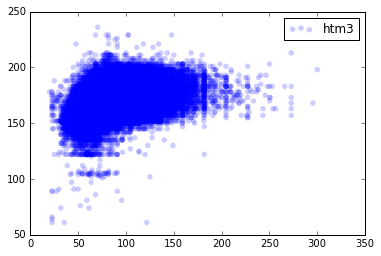

In [4]:
import thinkstats2
import thinkplot

thinkplot.Scatter(weights, heights)
thinkplot.show()

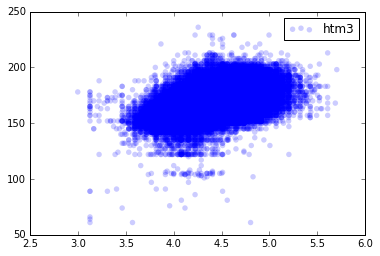

In [5]:
thinkplot.Scatter(logweights, heights)
thinkplot.show()

In [6]:
print thinkstats2.LeastSquares(weights, heights)
inter, slope = thinkstats2.LeastSquares(logweights, heights)
print inter, slope

(147.58094074007394, 0.27042072695863467)
68.0232589936 23.2493214367


For the log weights and heights the intercept was 68.7cm and slope was 23.1cm per log pound. This means that when the log weight is 0 this means that the height is 68.7cm which doesn't really make sense. We will fit this line better with the average weight.

In [7]:
mean = logweights.mean()
calcHeight = slope* mean + inter
print np.exp(mean), calcHeight # print mean weight and its calculated height

76.8094724943 168.956188484


This means that someone that weights 76.8kg is around 169.0 cm tall. When presenting this data I would probably convert log weights back to normal weights so people can actually understand what is going on.

In [8]:
res = logweights * slope + inter
thinkstats2.CoefDetermination(heights, res)

0.71726505688113296

The R^2 value is around .72 which is not a bad value but it doesn't show a strong correlation between weight and height.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.